In [1]:
#Importo le librerie necessarie per la gestione del dataset
import pandas as pd
from sklearn.model_selection import train_test_split

**Analisi dataset**

In [2]:
#Monto il drive
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/machine learning"

Mounted at /content/drive


In [3]:
#Carico il dataset
dataset = pd.read_csv(dataset_path + "/diabetes.csv")

In [4]:
#Mostro le prime righe del dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Mostro le statistiche descrittive
print("Statistiche descrittive:")
print(dataset.describe())

Statistiche descrittive:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0

In [6]:
#Rimuovo i dati uguali a 0 in colonne in cui un tale risultato sarebbe improbabile
dataset = dataset[(dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] != 0).all(axis=1)]

In [7]:
#Divido il dataset in X (features) e y (target)
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

In [8]:
#Divido il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

In [9]:
#Importo le librerie necessarie
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [10]:
#Calcolo l'entropia
def entropy(y):
    #Conto le occorrenze delle classi
    y_unique, y_unique_count = np.unique(y, return_counts=True)
    #Calcolo le probabilità
    probs = y_unique_count / len(y)
    #Calcolo l'entropia in base 2
    entropy_value = stats.entropy(probs, base=2)
    return entropy_value

#Calcolo l'entropia per la colonna Outcome (le classi)
outcome_entropy = entropy(dataset['Outcome'])
#Stampo il risultato
print(f"L'entropia del dataset per la colonna Outcome è: {outcome_entropy}")

L'entropia del dataset per la colonna Outcome è: 0.9165857571343128


In [11]:
#Creo il modello Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)

In [12]:
#Addestro il modello
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [13]:
#Valuto le prestazioni del modello sulle caratteristiche del test set
dt_y_pred = dt_model.predict(X_test)

In [14]:
#Calcolo la probabilità che ogni riga del test set appartenga alla classe 1
dt_y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

In [15]:
#Calcolo il report di classificazione
print("Report di Classificazione - Decision Tree:")
print(classification_report(y_test, dt_y_pred, target_names=['Non-Diabete', 'Diabete']))

Report di Classificazione - Decision Tree:
              precision    recall  f1-score   support

 Non-Diabete       0.83      0.75      0.79        52
     Diabete       0.59      0.70      0.64        27

    accuracy                           0.73        79
   macro avg       0.71      0.73      0.72        79
weighted avg       0.75      0.73      0.74        79



Importanza delle Feature - Decision Tree:
                    Feature  Importance
1                   Glucose    0.496851
4                   Insulin    0.148135
5                       BMI    0.118014
7                       Age    0.108036
3             SkinThickness    0.080563
0               Pregnancies    0.035926
6  DiabetesPedigreeFunction    0.012476
2             BloodPressure    0.000000


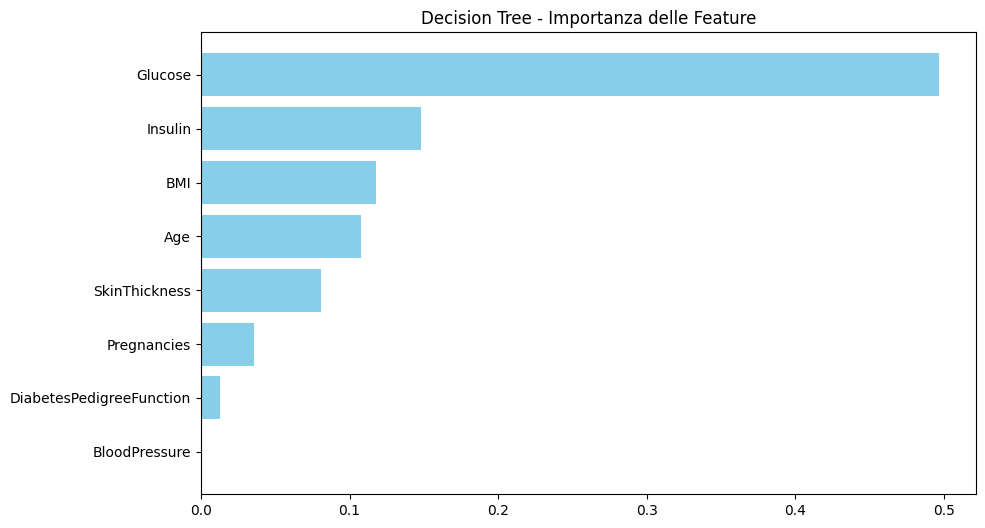

In [16]:
#Ottengo l'importanza delle features dal modello Decision Tree
#Creo una tabella con due colonne: Feature (caratteristiche) e Importance (importanza delle caratteristiche)
dt_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
#Ordino le features sulla base dell'importanza
dt_feature_importance = dt_feature_importance.sort_values(by='Importance', ascending=False)
#Stampo l'importanza delle features
print("Importanza delle Feature - Decision Tree:")
print(dt_feature_importance)

#Visualizzo l'importanza delle features
#Stabilizzo la dimensione del grafico
plt.figure(figsize=(10, 6))
#Creo un grafico a barre orizzontali
plt.barh(dt_feature_importance['Feature'], dt_feature_importance['Importance'], color='skyblue')
#Inserisco il titolo
plt.title("Decision Tree - Importanza delle Feature")
#Mostro la caratteristica più importante in cima
plt.gca().invert_yaxis()
#Mostro il grafico
plt.show()

In [17]:
#Calcolo il punteggio ROC-AUC
roc_auc = roc_auc_score(y_test, dt_y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.74


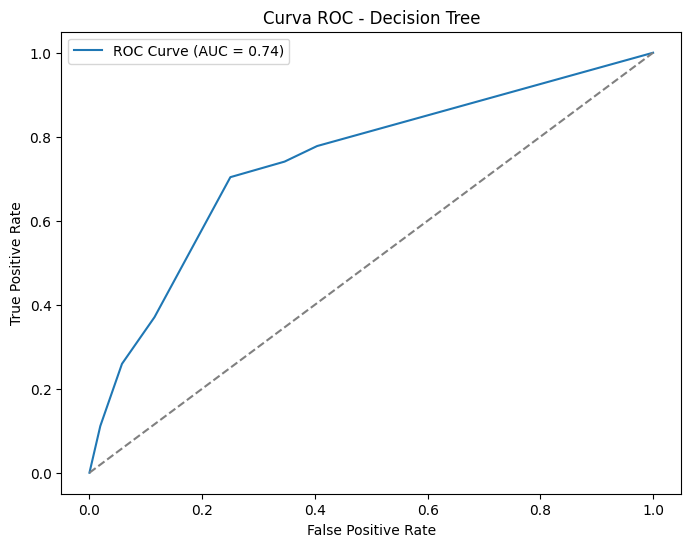

In [18]:
#Visualizzo la curva ROC
#Calcolo i dati per la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, dt_y_pred_prob)
#Definisco la dimensione del grafico
plt.figure(figsize=(8, 6))
#Disegno la curva ROC
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
#Aggiungo una riga di riferimento
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#Definisco asse x e y
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#Inserisco il titolo
plt.title("Curva ROC - Decision Tree")
#Mostro la legenda e il grafico
plt.legend()
plt.show()

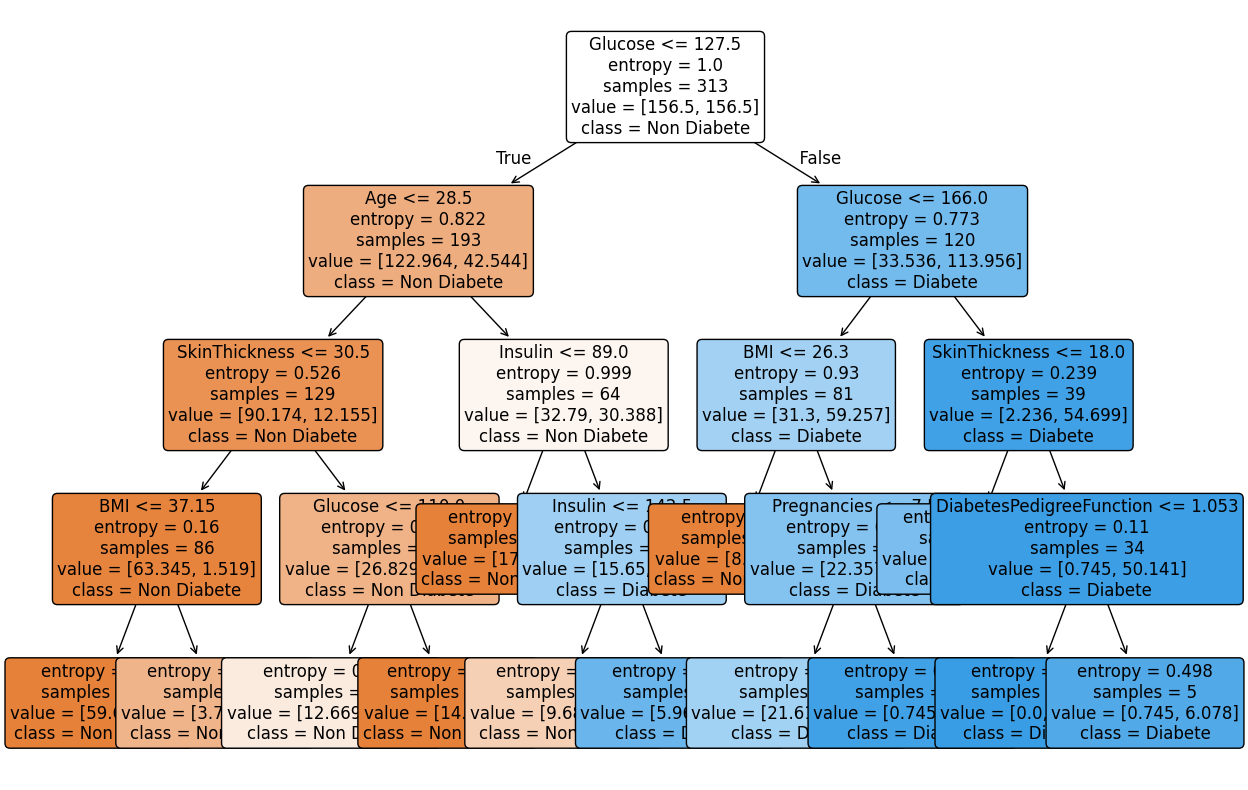

In [19]:
#Visualizzo l'albero di decisione
#Imposto la dimensione
plt.figure(figsize=(15, 10))
#Disegno l'albero decisionale specificandone le caratteristiche grafiche
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Non Diabete', 'Diabete'], rounded=True, fontsize=12)
#Mostro l'albero
plt.show()

In [20]:
#Verifico il funzionamento su nuovi dati
new_data = pd.DataFrame([[3, 150, 85, 30, 120, 32.5, 0.7, 45]],
                        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

#Predico le probabilità di sviluppo del diabete
probabilities = dt_model.predict_proba(new_data)

#Predico la probabilità di non sviluppare il diabete (Classe 0)
probability_not_diabetes = probabilities[0][0]

#Predico la probabilità di sviluppare il diabete (Classe 1)
probability_diabetes = probabilities[0][1]

#Stampo i risultati
print(f"Probabilità di NON sviluppare diabete: {probability_not_diabetes * 100:.2f}%")
print(f"Probabilità di sviluppare diabete: {probability_diabetes * 100:.2f}%")


Probabilità di NON sviluppare diabete: 34.50%
Probabilità di sviluppare diabete: 65.50%


**Regressione Logistica**

In [21]:
#Importo le librerie necessarie
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
#Standardizzo i dati
#Definisco l'oggetto scaler
scaler = StandardScaler()
#Standardizzo il train set
X_train_scaled = scaler.fit_transform(X_train)
#Standardizzo il test set
X_test_scaled = scaler.transform(X_test)

In [23]:
# Stampo i primi 5 record dell'array standardizzato
print("Prime cinque righe di X_train standardizzato:")
print(X_train_scaled[:5])

print("Prime righe di X_test standardizzato:")
print(X_test_scaled[:5])


Prime cinque righe di X_train standardizzato:
[[-1.02718262  1.86334398  1.51359244 -0.29002875 -0.58530001  0.46695542
  -0.60390597  0.3821851 ]
 [-0.07220789 -1.37262755  1.19953581 -1.22300922 -0.78854384 -0.8152489
  -0.62736081 -0.85991647]
 [ 1.51941667  0.0982686   1.35656412  0.64295172 -0.43286714  0.75188971
  -0.50129104  1.71983294]
 [-0.3905328  -0.88232883 -0.21371905 -1.50290336 -0.93250822 -1.72703864
   0.37240181 -0.47773137]
 [-0.07220789 -1.40531413  0.88547917  0.17646148 -0.75466987  0.13928098
   2.26344843 -0.3821851 ]]
Prime righe di X_test standardizzato:
[[ 1.20109176 -0.68620934  0.2573659   1.0161439  -0.45827262  0.56668242
  -0.92641005  1.33764784]
 [-1.02718262  0.13095518  0.72845085  0.73624976  0.43091912  0.43846199
   0.83270308 -0.7643702 ]
 [ 0.24611702 -1.24188122 -0.99886064 -0.66322094 -0.93250822 -0.77250876
  -0.62736081 -0.28663882]
 [-1.02718262  1.27498552  0.41439422  2.50891266 -0.50061509  2.84615676
   0.7007696  -0.57327765]
 [-1.02

In [24]:
#Inizializzo il modello di regressione logistica
rl_model = LogisticRegression(penalty='l2', C = 1.0, class_weight = 'balanced', random_state=42)

In [25]:
#Addestro il modello
rl_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [26]:
#Calcolo la probabilità che ogni riga dal test set appartenga alla classe 1
rl_y_pred_prob = rl_model.predict_proba(X_test_scaled)[:, 1]

In [27]:
#Calcolo le predizioni sul test set
rl_y_pred = rl_model.predict(X_test_scaled)

In [28]:
#Calcolo il report di classificazione
print("Report di Classificazione - Regressione Logistica:")
print(classification_report(y_test, rl_y_pred, target_names=['Non-Diabete', 'Diabete']))

Report di Classificazione - Regressione Logistica:
              precision    recall  f1-score   support

 Non-Diabete       0.83      0.77      0.80        52
     Diabete       0.61      0.70      0.66        27

    accuracy                           0.75        79
   macro avg       0.72      0.74      0.73        79
weighted avg       0.76      0.75      0.75        79



Importanza delle Feature - Regressione Logistica:
                    Feature  Importance
1                   Glucose    1.108544
6  DiabetesPedigreeFunction    0.423929
5                       BMI    0.381045
0               Pregnancies    0.334073
7                       Age    0.256937
3             SkinThickness    0.222212
4                   Insulin    0.159869
2             BloodPressure    0.132956


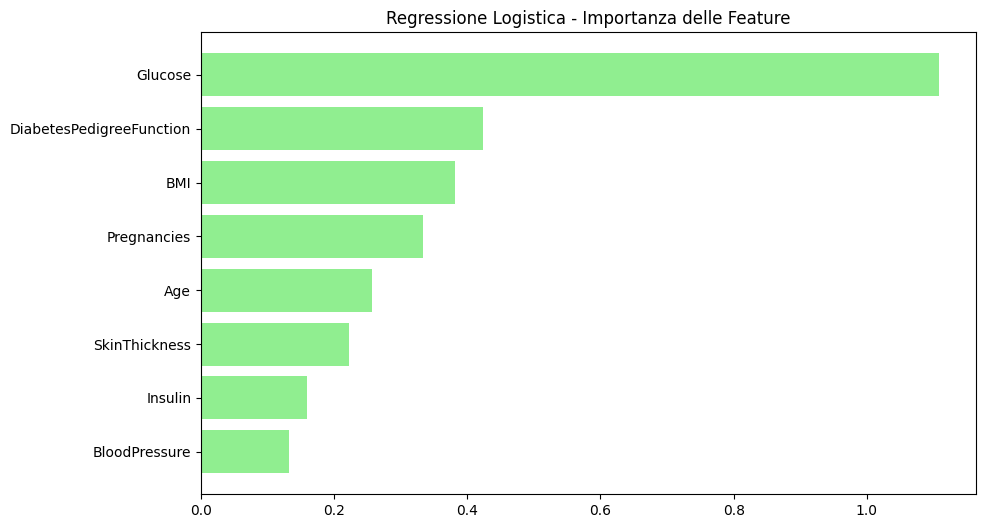

In [29]:
#Visualizzo l'importanza delle features
#Creo una tabella con due colonne: una con le features (caratteristiche) e una con i valori assoluti dei coefficienti
rl_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(rl_model.coef_[0])})
#Ordino la tabella per importanza
rl_feature_importance = rl_feature_importance.sort_values(by='Importance', ascending=False)
#Stampo la tabella
print("Importanza delle Feature - Regressione Logistica:")
print(rl_feature_importance)

#Visualizzo l'importanza delle feature
#Definisco la dimensione del grafico
plt.figure(figsize=(10, 6))
#Creo un grafico a barre orizzontali
plt.barh(rl_feature_importance['Feature'], rl_feature_importance['Importance'], color='lightgreen')
#Definisco il titolo
plt.title("Regressione Logistica - Importanza delle Feature")
#Metto le caretteristiche più importanti in cima
plt.gca().invert_yaxis()
#Mostro il grafico
plt.show()

In [30]:
#Calcolo il punteggio ROC-AUC
roc_auc = roc_auc_score(y_test, rl_y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.83


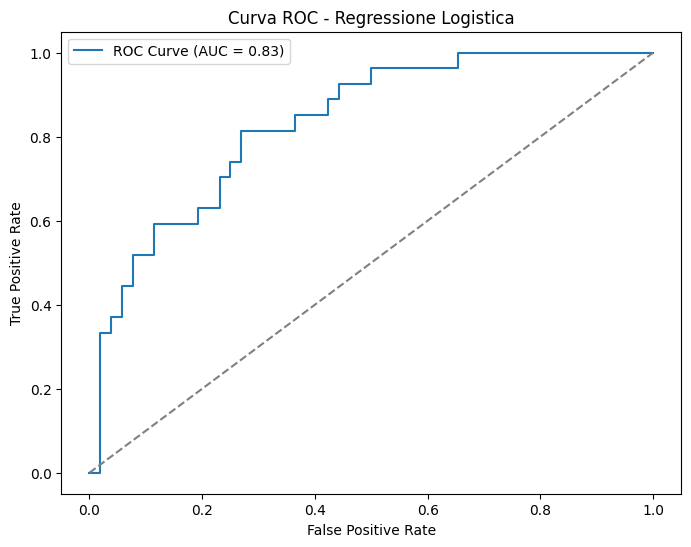

In [31]:
#Visualizzo la curva ROC
#Calcolo i dati per la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, rl_y_pred_prob)
#Definisco la dimensione del grafico
plt.figure(figsize=(8, 6))
#Disegno la curva ROC
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
#Aggiungo una riga di riferimento
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#Definisco asse x e y
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#Inserisco il titolo
plt.title("Curva ROC - Regressione Logistica")
#Mostro la legenda e il grafico
plt.legend()
plt.show()

In [32]:
#Verifico il funzionamento su nuovi dati
new_data = pd.DataFrame([[3, 150, 85, 30, 120, 32.5, 0.7, 45]],
                        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

#Standardizzo i nuovi dati inseriti
new_data_scaled = scaler.transform(new_data)

#Predico la probabilità di sviluppare o meno il diabete
probabilities = rl_model.predict_proba(new_data_scaled)

#Estraggo le probabilità di non avere o avere il diabete
probability_no_diabetes = probabilities[0][0]
probability_diabetes = probabilities[0][1]

#Stampo i risultati
print(f"Probabilità di NON avere il diabete: {probability_no_diabetes * 100:.2f}%")
print(f"Probabilità di avere il diabete: {probability_diabetes * 100:.2f}%")

Probabilità di NON avere il diabete: 22.04%
Probabilità di avere il diabete: 77.96%


**Support Vector Machine Lineare**

In [33]:
#Importo le librerie necessarie
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [34]:
#Inizializzo il modello svm
svm_model = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)

In [35]:
#Addestro il modello svm
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

In [36]:
#Eseguo le previsioni sul test set
svm_y_pred = svm_model.predict(X_test_scaled)

In [37]:
#Calcolo la probabilità che ogni riga dal test set appartenga alla classe 1
svm_y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

In [38]:
#Calcolo il report di classificazione
print("Report di Classificazione - Support Vector Machine Lineare:")
print(classification_report(y_test, svm_y_pred, target_names=['Non-Diabete', 'Diabete']))

Report di Classificazione - Support Vector Machine Lineare:
              precision    recall  f1-score   support

 Non-Diabete       0.82      0.81      0.82        52
     Diabete       0.64      0.67      0.65        27

    accuracy                           0.76        79
   macro avg       0.73      0.74      0.74        79
weighted avg       0.76      0.76      0.76        79



Importanza delle Features - Support Vector Machine Lineare:
                    Feature  Importance
1                   Glucose    0.826687
5                       BMI    0.333971
6  DiabetesPedigreeFunction    0.290792
0               Pregnancies    0.245176
4                   Insulin    0.190889
7                       Age    0.179857
3             SkinThickness    0.065191
2             BloodPressure    0.051606


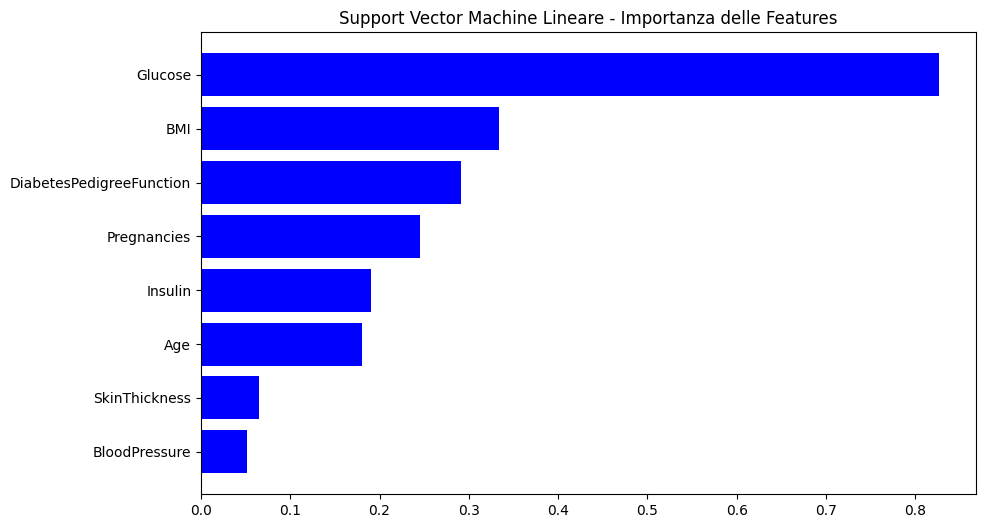

In [39]:
#Visualizzo l'importanza delle feature
#Creo una tabella con due colonne: Feature contenente le caratteristiche e Importance contenente i coefficienti del modello
svm_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(svm_model.coef_[0])})
#Ordino le features per importanza
svm_feature_importance = svm_feature_importance.sort_values(by='Importance', ascending=False)
#Stampo la tabella
print("Importanza delle Features - Support Vector Machine Lineare:")
print(svm_feature_importance)

#Visualizzo l'importanza delle feature
#Definisco la dimensione del grafico
plt.figure(figsize=(10, 6))
#Creo un grafico a barre orizzontali
plt.barh(svm_feature_importance['Feature'], svm_feature_importance['Importance'], color='blue')
#Definisco un titolo
plt.title("Support Vector Machine Lineare - Importanza delle Features")
#Metto in cima le caratteristiche più importanti
plt.gca().invert_yaxis()
#Mostro il grafico
plt.show()

In [40]:
#Calcolo il punteggio ROC-AUC
roc_auc = roc_auc_score(y_test, svm_y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.83


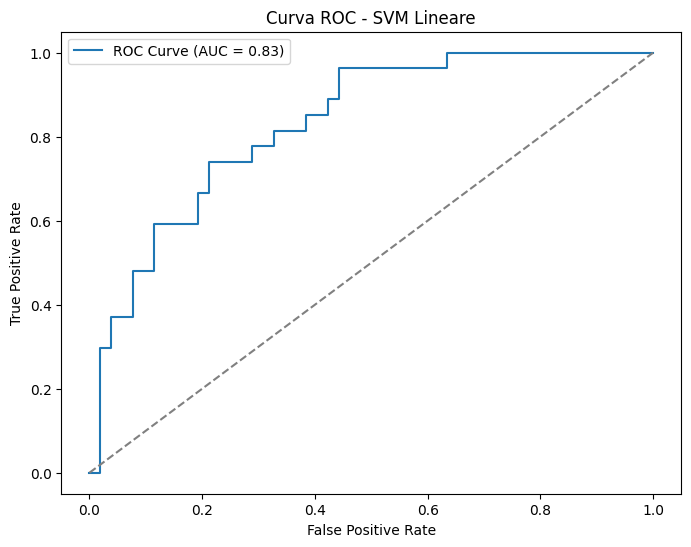

In [41]:
#Visualizzo la curva ROC
#Calcolo i dati per la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, svm_y_pred_prob)
#Definisco la dimensione del grafico
plt.figure(figsize=(8, 6))
#Disegno la curva ROC
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
#Aggiungo una riga di riferimento
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#Definisco asse x e y
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#Inserisco il titolo
plt.title("Curva ROC - SVM Lineare")
#Mostro la legenda e il grafico
plt.legend()
plt.show()

In [42]:
#Verifico il funzionamento su nuovi dati
new_data = pd.DataFrame([[3, 150, 85, 30, 120, 32.5, 0.7, 45]],
                        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

#Standardizzo i nuovi dati inseriti
new_data_scaled = scaler.transform(new_data)

#Predico la probabilità di sviluppare o meno il diabete
probabilities = svm_model.predict_proba(new_data_scaled)

#Estraggo le probabilità di non avere o avere il diabete
probability_no_diabetes = probabilities[0][0]
probability_diabetes = probabilities[0][1]

#Stampo i risultati
print(f"Probabilità di NON avere il diabete: {probability_no_diabetes * 100:.2f}%")
print(f"Probabilità di avere il diabete: {probability_diabetes * 100:.2f}%")

Probabilità di NON avere il diabete: 44.94%
Probabilità di avere il diabete: 55.06%


**SVM non lineare**

In [43]:
import shap

In [44]:
#Inizializzo il modello svm non lineare
svm_rbf_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

In [45]:
#Addestro il modello
svm_rbf_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [46]:
#Eseguo le previsioni sul test set
svm_rbf_y_pred = svm_rbf_model.predict(X_test_scaled)

In [47]:
#Calcolo la probabilità che ogni riga dal test set appartenga alla classe 1
svm_rbf_y_pred_prob = svm_rbf_model.predict_proba(X_test_scaled)[:, 1]

In [48]:
#Calcolo il report di classificazione
print("Report di Classificazione - Support Vector Machine Non Lineare:")
print(classification_report(y_test, svm_rbf_y_pred, target_names=['Non-Diabete', 'Diabete']))

Report di Classificazione - Support Vector Machine Non Lineare:
              precision    recall  f1-score   support

 Non-Diabete       0.82      0.77      0.79        52
     Diabete       0.60      0.67      0.63        27

    accuracy                           0.73        79
   macro avg       0.71      0.72      0.71        79
weighted avg       0.74      0.73      0.74        79



  0%|          | 0/79 [00:00<?, ?it/s]

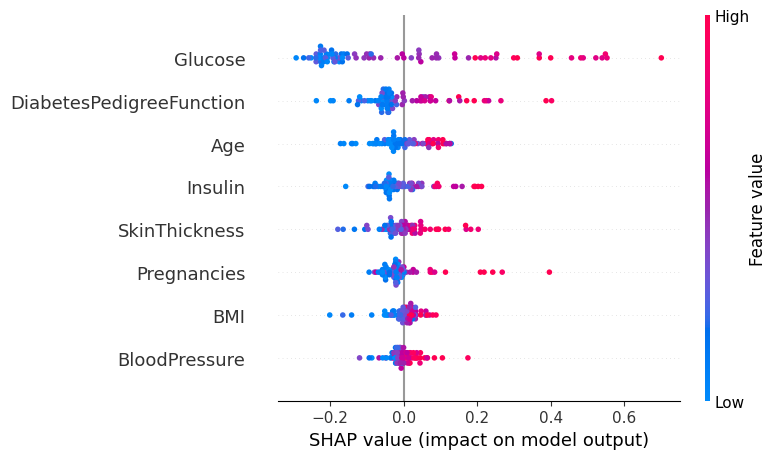

In [49]:
#Calcolo l'importanza delle features
#Uso i dati di set per capire come cambieranno le predizioni se cambio le features
explainer = shap.KernelExplainer(svm_rbf_model.predict, X_test_scaled)
#Calcolo quanto ogni features contribuisce alle predizioni
shap_values = explainer.shap_values(X_test_scaled)
#Creo un grafico che mostri l'importanza delle features
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

In [50]:
#Calcolo il punteggio ROC-AUC
roc_auc = roc_auc_score(y_test, svm_rbf_y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.81


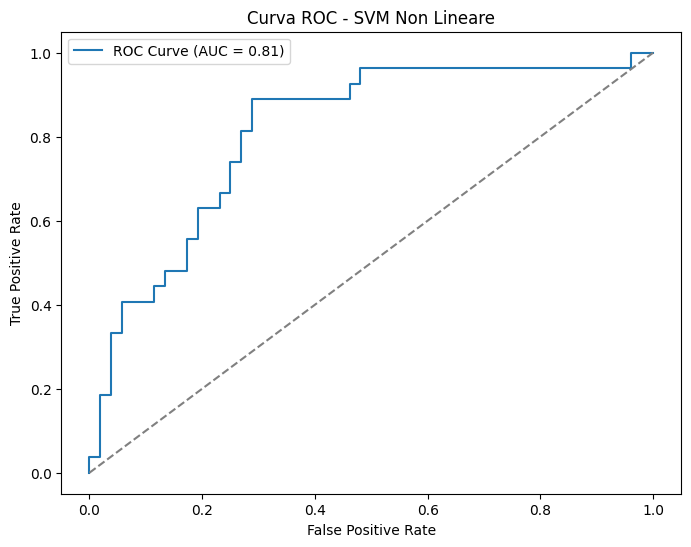

In [51]:
#Visualizzo la curva ROC
#Calcolo i dati per la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, svm_rbf_y_pred_prob)
#Definisco la dimensione del grafico
plt.figure(figsize=(8, 6))
#Disegno la curva ROC
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
#Aggiungo una riga di riferimento
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#Definisco asse x e y
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#Inserisco il titolo
plt.title("Curva ROC - SVM Non Lineare")
#Mostro la legenda e il grafico
plt.legend()
plt.show()

In [52]:
#Verifico il funzionamento su nuovi dati
new_data = pd.DataFrame([[3, 150, 85, 30, 120, 32.5, 0.7, 45]],
                        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

#Standardizzo i nuovi dati inseriti
new_data_scaled = scaler.transform(new_data)

#Predico la probabilità di sviluppare o meno il diabete
probabilities = svm_rbf_model.predict_proba(new_data_scaled)

#Estraggo le probabilità di non avere o avere il diabete
probability_no_diabetes = probabilities[0][0]
probability_diabetes = probabilities[0][1]

#Stampo i risultati
print(f"Probabilità di NON avere il diabete: {probability_no_diabetes * 100:.2f}%")
print(f"Probabilità di avere il diabete: {probability_diabetes * 100:.2f}%")

Probabilità di NON avere il diabete: 14.79%
Probabilità di avere il diabete: 85.21%
